#새로운 feature로 시도

In [1942]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1943]:
import pandas as pd
import numpy as np

In [1944]:
path1='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/newdata_all_0820_rotate_32_x.xlsx'
#'/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/newdata_all_0819_normed_min.xlsx'

In [1945]:
data= pd.read_excel(path1)

In [1946]:
data

,x_1-0,y_1-0,x_2-1,y_2-1,x_3-2,y_3-2,x_4-3,y_4-3,x_5-4,y_5-4,x_6-5,y_6-5,x_7-6,y_7-6,x_8-7,y_8-7,x_9-8,y_9-8,x_10-9,y_10-9,x_11-10,y_11-10,x_12-11,y_12-11,x_13-12,y_13-12,x_14-13,y_14-13,x_15-14,y_15-14,x_16-15,y_16-15,y,image
0,0.059483,0.047791,0.117681,0.037177,0.108911,-6.938894e-18,0.102761,0.000781,-0.067272,0.106284,0.090851,-0.037551,0.020762,-0.053539,-0.000663,-0.049232,-0.126677,0.091841,0.074080,-0.048951,-0.034998,-0.067212,-0.034704,-0.052495,-0.026695,0.121091,0.025404,-0.065380,-0.065823,-0.059163,-0.049266,-0.037874,0,not_correct10.MP4_000002.243.jpg
1,0.088238,0.039870,0.111497,0.031659,0.106251,-6.938894e-18,0.091216,-0.000797,-0.054548,0.126776,0.064970,-0.066325,-0.015064,-0.069841,-0.022040,-0.044777,-0.031284,0.136956,0.062474,-0.060135,-0.055480,-0.073939,-0.047930,-0.042525,0.024458,0.131533,0.032674,-0.068518,-0.067078,-0.067196,-0.046953,-0.033332,0,not_correct10.MP4_000004.040.jpg
2,0.074786,0.029389,0.109923,0.027463,0.106390,0.000000e+00,0.090829,-0.003327,-0.042942,0.127572,0.069100,-0.056238,-0.007140,-0.065612,-0.020420,-0.050944,-0.049653,0.131762,0.065004,-0.057998,-0.050233,-0.072696,-0.049552,-0.050360,0.016472,0.136776,0.032386,-0.064413,-0.066488,-0.063819,-0.047665,-0.037979,0,not_correct10.MP4_000004.240.jpg
3,0.075837,0.025564,0.108562,0.021815,0.115656,-6.938894e-18,0.094668,-0.005780,-0.051041,0.129546,0.071232,-0.069228,-0.020892,-0.076479,-0.031390,-0.052954,-0.022616,0.162404,0.058829,-0.075954,-0.062551,-0.085586,-0.056928,-0.055934,0.041617,0.175992,0.026054,-0.081117,-0.064761,-0.074281,-0.045816,-0.045548,0,not_correct10.MP4_000004.440.jpg
4,0.096608,0.045197,0.114652,0.033341,0.106542,6.938894e-18,0.096588,-0.000523,-0.063558,0.112743,0.075623,-0.047701,0.015439,-0.055260,-0.006942,-0.049723,-0.100304,0.102963,0.057556,-0.060177,-0.023646,-0.069867,-0.034987,-0.056994,-0.023224,0.139539,0.026484,-0.071770,-0.054111,-0.063163,-0.042928,-0.044375,0,not_correct10.MP4_000004.640.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.155021,0.077519,0.174503,0.043141,0.152823,1.387779e-17,0.149967,0.021214,-0.114225,0.115594,0.145628,-0.022340,0.007679,-0.082363,-0.052359,-0.088204,-0.136920,0.115682,0.147726,-0.029766,-0.007167,-0.097603,-0.045154,-0.085594,-0.141017,0.135980,0.109007,-0.045937,-0.019847,-0.096490,-0.047022,-0.078923,1,correct4.mp4_000005.383.jpg
1184,0.150196,0.090659,0.170437,0.048558,0.146912,0.000000e+00,0.142907,0.021097,-0.110664,0.114058,0.144921,-0.007870,0.015625,-0.076645,-0.047765,-0.089171,-0.140453,0.090576,0.154072,-0.009768,0.009694,-0.089330,-0.034426,-0.086298,-0.171909,0.103428,0.112784,-0.035927,-0.006997,-0.094875,-0.035708,-0.083506,1,correct4.mp4_000005.450.jpg
1185,0.150619,0.092911,0.163893,0.047062,0.142344,0.000000e+00,0.142907,0.021708,-0.101500,0.107907,0.147984,0.000143,0.015389,-0.069576,-0.055730,-0.085872,-0.140190,0.070350,0.154307,-0.007271,0.005616,-0.084368,-0.046397,-0.083842,-0.158008,0.092519,0.113788,-0.029118,-0.012646,-0.086687,-0.049147,-0.077047,1,correct4.mp4_000005.517.jpg
1186,0.144129,0.091378,0.167189,0.047378,0.148878,0.000000e+00,0.146398,0.022524,-0.106003,0.109750,0.138529,-0.006895,0.006532,-0.076884,-0.059461,-0.090202,-0.110858,0.091502,0.151581,-0.007886,0.000093,-0.089106,-0.046714,-0.087615,-0.147400,0.102553,0.113283,-0.030557,-0.013723,-0.091946,-0.047030,-0.083713,1,correct4.mp4_000005.583.jpg


In [1947]:
path2='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/correct38_semi_final.xlsx'

In [1948]:
path3='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/not_correct18_semi_final2.xlsx'

In [1949]:
testdata = pd.read_excel(path2)
testdata
new_x1 = testdata.drop(['d_ratio','sin dif','y','image'], axis=1)
#y = data["y"]

In [1950]:
testdata = pd.read_excel(path3)
testdata
new_x2 = testdata.drop(['d_ratio','sin dif','y','image'], axis=1)
#y = data["y"]

##올바르지 않은

In [1951]:
#data.drop(['z_4-3','z_7-6','z_8-7','z_11-10','z_12-11','z_15-14','z_16-15'], axis=1)

In [1952]:
vector0= data[data['y']==0]

In [1953]:
len(vector0)

458

In [1954]:
#vector0.drop(['Unnamed: 0', 'y','image'], axis=1, inplace=True)
vector0.drop(['y','image'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


정규화

In [1955]:
#RobustScaler: outlier 많은 경우 -> boxplot 보고 결정
#StandardScaler: 거리 기반 알고리즘
#MinMaxScaler: gradient descent 알고리즘

In [1956]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler = RobustScaler()
#vector0_=scaler.fit_transform(vector0)

In [1957]:
#vector0_

##올바른

In [1958]:
vector1= data[data['y']==1]

In [1959]:
#vector1.drop(['Unnamed: 0', 'y','image'], axis=1, inplace=True)
vector1.drop(['y','image'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [1960]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler = RobustScaler()
#vector1_=scaler.fit_transform(vector1)

In [1961]:
#vector1_

#LSTM

데이터셋 분리

In [1962]:
from sklearn.model_selection import train_test_split

In [1963]:
vector0 = np.array(vector0_)
vector1 = np.array(vector1_)
len(vector0), len(vector1)
vector0.shape, vector1.shape

((458, 32), (730, 32))

In [1964]:
#x0_train = vector0[:int(0.7*len(vector0))]
#x0_test = vector0[int(0.7*len(vector0)):]

In [1965]:
#x0_train.shape, x0_test.shape
x0_test = vector0
x0_test.shape

(458, 32)

In [1966]:
x1_train = vector1[:int(0.7*len(vector1))]
x1_test = vector1[int(0.7*len(vector1)):]

In [1967]:
x1_train.shape, x1_test.shape

((510, 32), (220, 32))

비정상 :1, 정상: 0

In [1968]:
x0_test_tot = np.hstack((x0_test, np.ones(x0_test.shape[0]).reshape(-1,1)))
x1_test_tot = np.hstack((x1_test, np.zeros(x1_test.shape[0]).reshape(-1,1)))
test_tot = np.vstack((x0_test_tot, x1_test_tot))

In [1969]:
x_test, x_valid, y_test, y_valid = train_test_split(test_tot[:,:-1], test_tot[:,-1], test_size=0.3)

In [1970]:
print(x_test.shape, x_valid.shape, y_test.shape)

(474, 32) (204, 32) (474,)


데이터 차원 변경

In [1971]:
x1_train =x1_train.reshape(x1_train.shape[0],1,x1_train.shape[1])
x_test =x_test.reshape(x_test.shape[0],1,x_test.shape[1])
x_valid =x_valid.reshape(x_valid.shape[0],1,x_valid.shape[1])

In [1972]:
print(x1_train.shape,x_test.shape,x_valid.shape)

(510, 1, 32) (474, 1, 32) (204, 1, 32)


신경망 구축

In [1973]:
from keras import regularizers
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector

In [1974]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    # return_sequences 가 True면 각 time_steps의 셀이 모두 출력으로 내보냄 , False 면 최종 셀만 출력으로 내보냄
    L1 = LSTM(64, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(32, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(32, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(64, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [1975]:
model = autoencoder_model(x1_train)
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "model_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_81 (InputLayer)        [(None, 1, 32)]           0         
_________________________________________________________________
lstm_320 (LSTM)              (None, 1, 64)             24832     
_________________________________________________________________
lstm_321 (LSTM)              (None, 32)                12416     
_________________________________________________________________
repeat_vector_80 (RepeatVect (None, 1, 32)             0         
_________________________________________________________________
lstm_322 (LSTM)              (None, 1, 32)             8320      
_________________________________________________________________
lstm_323 (LSTM)              (None, 1, 64)             24832     
_________________________________________________________________
time_distributed_80 (TimeDis (None, 1, 32)             208

In [1976]:
model = autoencoder_model(x1_train)
model.compile(optimizer='adam',loss='mse')

In [1977]:
epochs=25
batch_size=15
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

history = model.fit(x1_train, x1_train, epochs=epochs, batch_size= batch_size,callbacks = callbacks, validation_split=0.05).history

Epoch 1/25
33/33 [==============================] - 5s 23ms/step - loss: 0.2653 - val_loss: 0.3474
Epoch 2/25
33/33 [==============================] - 0s 6ms/step - loss: 0.1417 - val_loss: 0.0828
Epoch 3/25
33/33 [==============================] - 0s 6ms/step - loss: 0.0417 - val_loss: 0.0714
Epoch 4/25
33/33 [==============================] - 0s 5ms/step - loss: 0.0374 - val_loss: 0.0714
Epoch 5/25
33/33 [==============================] - 0s 6ms/step - loss: 0.0371 - val_loss: 0.0715
Epoch 6/25
33/33 [==============================] - 0s 6ms/step - loss: 0.0368 - val_loss: 0.0687
Epoch 7/25
33/33 [==============================] - 0s 6ms/step - loss: 0.0366 - val_loss: 0.0697
Epoch 8/25
33/33 [==============================] - 0s 6ms/step - loss: 0.0362 - val_loss: 0.0659
Epoch 9/25
33/33 [==============================] - 0s 6ms/step - loss: 0.0359 - val_loss: 0.0643
Epoch 10/25
33/33 [==============================] - 0s 6ms/step - loss: 0.0353 - val_loss: 0.0669
Epoch 11/25
33/33 

In [1978]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

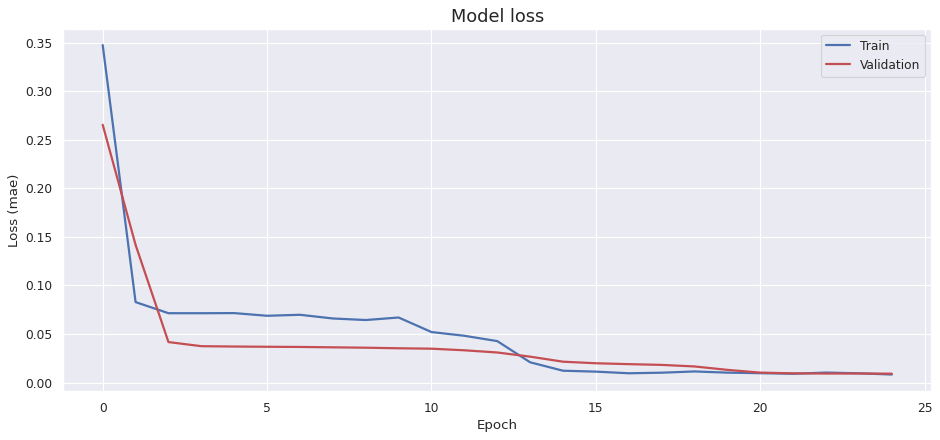

In [1979]:
# 학습 손실 시각화
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['val_loss'], 'b', label='Train', linewidth=2)
ax.plot(history['loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [1980]:
from sklearn import metrics

precision:  0.8321678321678322 , recall:  0.8321678321678322
threshold:  0.018841396094356165


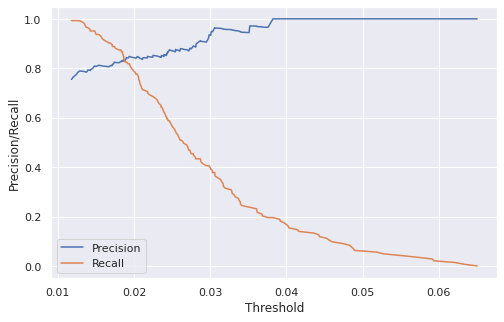

In [1981]:
#검증 데이터 입력
predictions_3d = model.predict(x_valid)
predictions = predictions_3d.reshape(predictions_3d.shape[0], predictions_3d.shape[2])
x_valid_ = x_valid.reshape(x_valid.shape[0], x_valid.shape[2])

#재구성 손실 값 도출
mse = np.mean(np.power(x_valid_ - predictions, 2), axis = 1)

error_df = pd.DataFrame({'Reconstruction_error':mse, 'True_class': y_valid})

precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error']) ##auc curve 사용 말고 다른 방법

#모델 최적의 threshold 값 찾기
best_cnt_dic = abs(precision_rt - recall_rt)
threshold_fixed = threshold_rt[np.argmin(best_cnt_dic)]  #둘의 차가 최소가 될때가 threshold
print('precision: ', precision_rt[np.argmin(best_cnt_dic)], ', recall: ', recall_rt[np.argmin(best_cnt_dic)])
print('threshold: ', threshold_fixed)

plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], label = 'Precision')
plt.plot(threshold_rt, recall_rt[1:], label = 'Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [1982]:
#from sklearn.metrics import f1_score
#f1 = f1_score(error_df['True_class'], error_df['Reconstruction_error'])

모델 성능 평가

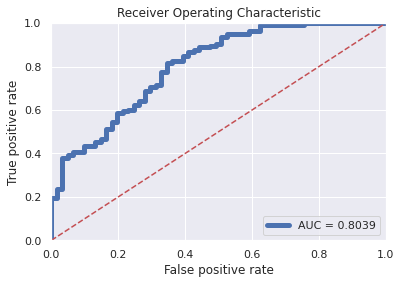

In [1983]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_valid, mse)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc, linewidth=5)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([-0.001,1])
plt.ylim([0,1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

     Reconstruction_error  True_class
0                0.046768         1.0
1                0.036814         1.0
2                0.036647         1.0
3                0.022611         1.0
4                0.045127         1.0
..                    ...         ...
469              0.026126         1.0
470              0.026176         1.0
471              0.021150         0.0
472              0.019957         1.0
473              0.026784         1.0

[474 rows x 2 columns]
accuracy:  [0.73839662]


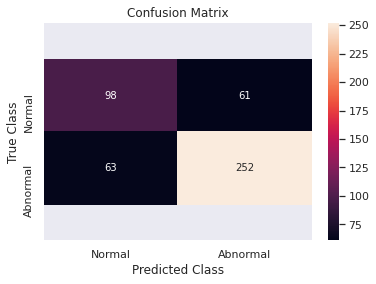

In [1984]:
test_predictions_3d = model.predict(x_test)
test_predictions = test_predictions_3d.reshape(test_predictions_3d.shape[0], test_predictions_3d.shape[2])
x_test_ = x_test.reshape(x_test.shape[0], x_test.shape[2])
mse = np.mean(np.power(x_test_ - test_predictions, 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': y_test})
print(error_df)

pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]
conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)

accuracy = (conf_matrix[0][0]+ conf_matrix[1][[1]])/conf_matrix.sum()
print('accuracy: ',accuracy)

sns.heatmap(conf_matrix, xticklabels=['Normal','Abnormal'], yticklabels=['Normal', 'Abnormal'], annot=True, fmt='d', annot_kws={'size':10})
b,t = plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

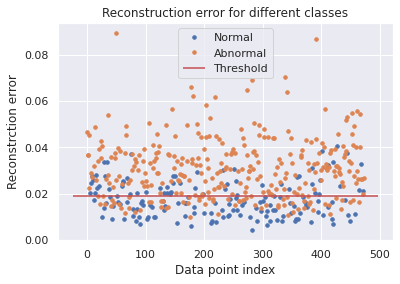

In [1985]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
  ax.plot(group.index, group.Reconstruction_error, marker = 'o', ms=3.5, linestyle='',
          label='Abnormal' if name ==1 else 'Normal')

ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors ='r', zorder=100, label ='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")  
plt.ylabel("Reconstrction error")
plt.xlabel("Data point index")
plt.show()

새로운 데이터 예측

In [1986]:
new_x1= np.array(new_x1)
new_x1 =new_x1.reshape(new_x1.shape[0],1,new_x1.shape[1])

new_x1.shape

(51, 1, 32)

In [1987]:
#올바른 젓가락질
test_predictions_3d = model.predict(new_x1)
test_predictions = test_predictions_3d.reshape(test_predictions_3d.shape[0], test_predictions_3d.shape[2])
x_test_ = new_x1.reshape(new_x1.shape[0], new_x1.shape[2])
mse = np.mean(np.power(x_test_ - test_predictions, 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse})

pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

print(pred_y)

correct=0
notcorrect=0
for i in pred_y:
  if i == 0 :
    correct+=1
  else:
    notcorrect+=1

if correct > notcorrect :
  print("올바른 젓가락질입니다.")
elif correct == notcorrect:
  print("재촬영해주세요")
else:
  print("올바르지 않은 젓가락질입니다.")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
올바르지 않은 젓가락질입니다.


In [1988]:
new_x2= np.array(new_x2)
new_x2 =new_x2.reshape(new_x2.shape[0],1,new_x2.shape[1])

new_x2.shape

(60, 1, 32)

In [1989]:
#올바르지 않은
test_predictions_3d = model.predict(new_x2)
test_predictions = test_predictions_3d.reshape(test_predictions_3d.shape[0], test_predictions_3d.shape[2])
x_test_ = new_x2.reshape(new_x2.shape[0], new_x2.shape[2])
mse = np.mean(np.power(x_test_ - test_predictions, 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse})

pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

print(pred_y)

correct=0
notcorrect=0
for i in pred_y:
  if i == 0 :
    correct+=1
  else:
    notcorrect+=1

if correct > notcorrect :
  print("올바른 젓가락질입니다.")
elif correct == notcorrect:
  print("재촬영해주세요")
else:
  print("올바르지 않은 젓가락질입니다.")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
올바르지 않은 젓가락질입니다.
